<a href="https://colab.research.google.com/github/asrorbekeraliev/DiabetPrediction/blob/main/Diabet%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [2]:
df.shape

(768, 9)

In [3]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Axes: xlabel='BMI', ylabel='Glucose'>

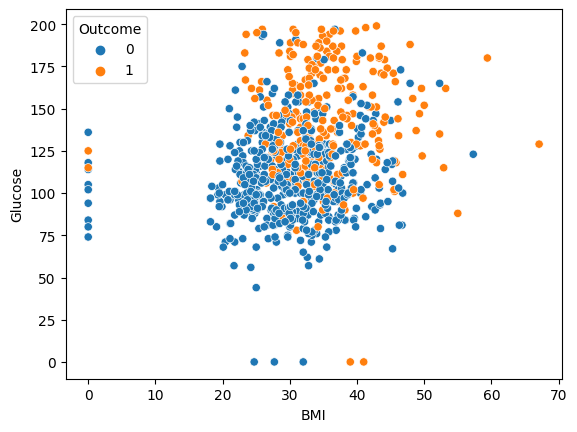

In [108]:
sns.scatterplot(x=df.BMI, y=df.Glucose, hue=df.Outcome)

In [109]:
corr_matrix = df.corrwith(df.Outcome).abs().sort_values(ascending=False)
corr_matrix

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

In [120]:
# ML ga tayyorgarlik
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [121]:
# Standart scale qilish
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [134]:
# ML
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12)

# kNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [135]:
y_predict = knn.predict(X_test)

In [76]:
# Baholash

In [136]:
# Jaccard index
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_predict)

0.6060606060606061

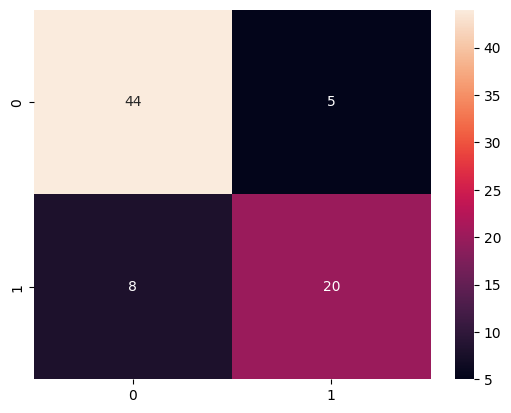

In [137]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [138]:
# Grid search yordamida eng yaxshi k ni topish
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X, y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=17),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [139]:
knn_gscv.best_params_

{'n_neighbors': 17}